# **Raspberry Pi Zero W - Practice**

## Getting Started

### Sourcing the Pi Zero W

As discussed with Ben and Melinda during one of my earlier meetings for thesis, sourcing the Raspberry Pi Zero W proved to be one of the initial hurdles of this project. Not only is the Pi Zero W often out of stock, the Raspberry Pi Foundation has limited the sale of one Pi Zero W per customer which makes it all the more difficult to source a stockpile of these boards for testing purposes. 

I conducted a vendor screening on the 17/07/2020 - the Excel file has been uploaded onto SHL teams. Most local vendors out of stock, the remaining vendors were either overseas or sold the Pi Zero W's at unreasonably inflated prices. Luckily I was able to source a Pi Zero W from a friend of mine who had a spare on hand.

### Gathering the necessary components

The following pieces of equipment were purchased for setup of the Pi Zero W:

    1x 16GB Micro SD Card (9 AUD)
    1x Multicard Reader with USB 2.0 Hub input (17 AUD)
Both items were purchased from Officeworks. 

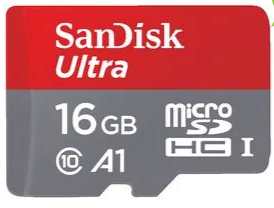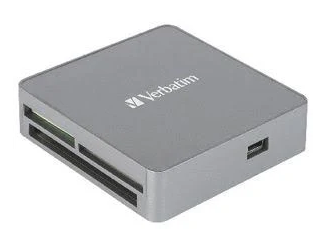

### Setting up the software

In order to access the Pi Zero W directly over USB connection, headless SSH access needed to be setup - the following guide was followed: https://desertbot.io/blog/headless-pi-zero-ssh-access-over-usb-windows?fbclid=IwAR0HHEW8AG63u5XTH_QIqGYqvfIS3r3zvBPypFTo7GvtI566ymInhyD5q8A

Upon completion of this setup, the Pi Zero W is accessible through using a USB to mini-USB cable connection and  SSH login over PuTTY. I have kept  the default username (pi) and changed the password. 

I used the following website as a guide to enable coding directly onto the Pi Zero W: https://learn.sparkfun.com/tutorials/python-programming-tutorial-getting-started-with-the-raspberry-pi/all

## Simple sound detection script

This script was taken from the following website purely for the purposes of exploring the capabilities of the Pi Zero W and familiarising myself with the board.
https://www.instructables.com/id/Sound-Sensor-Raspberry-Pi/
(All credits to the author)

In [ ]:
import RPi.GPIO as GPIO
import time

#Setting up GPIO Pin 17
channel = 17
GPIO.setmode(GPIO.BCM)
GPIO.setup(channel, GPIO.IN)

def callback(channel):
    if GPIO.input(channel):
        print("Sound Detected!")
    else:
        print("Sound Detected")
        
GPIO.add_event_detect(channel, GPIO.BOTH, bouncetime = 300)
GPIO.add_event_callback(channel, callback)

while True:
    time.sleep(1)

<b><font color = red> Issues Encountered </font></b>

I initially set up the Pi Zero W on a network which was not my home network nor my phone hotspot network. When attempting to install the RPi.GPIO package I ran into issues downloading the package as the Pi was not connected to the internet. Initially I did not recognise this as the issue, however after several attempts at troubleshooting the solution was found through this thread: https://raspberrypi.stackexchange.com/questions/11631/how-to-setup-multiple-wifi-networks

Within the wpa_supplicant.conf folder, I added 2 WiFi networks: my home WiFi and my iPhone Hotspot. I tested the board was now connected to the internet by pinging www.google.com and verified this by installing the RPi.GPIO package. 

## Building and testing the circuit

Since the final output of my research project involves me building a digital microphone array using the VM3000 piezoelectric MEMS microphones and a PCB, it is important for me to familiarise myself with the practical aspects of circuit-building using the Pi Zero W. In doing so, I sourced the following equipment from the UWA Maker's Lab to play around with:

    2x Breadboards
    2x Orange LEDs
    2x Red LEDs
    3x 680 Ohm Resistors
    1x CZN-15E Microphone based sound sensor module (https://rarecomponents.com/store/1564)
    
Note that in building the circuit necessary for the above code, only the microphone modules, a single breadboard and a few connection leads were required. The intent behind these pieces of equipment is to produce a microphone circuit and record the sound output. The following GPIO layout was used as reference for the Pi Zero W:

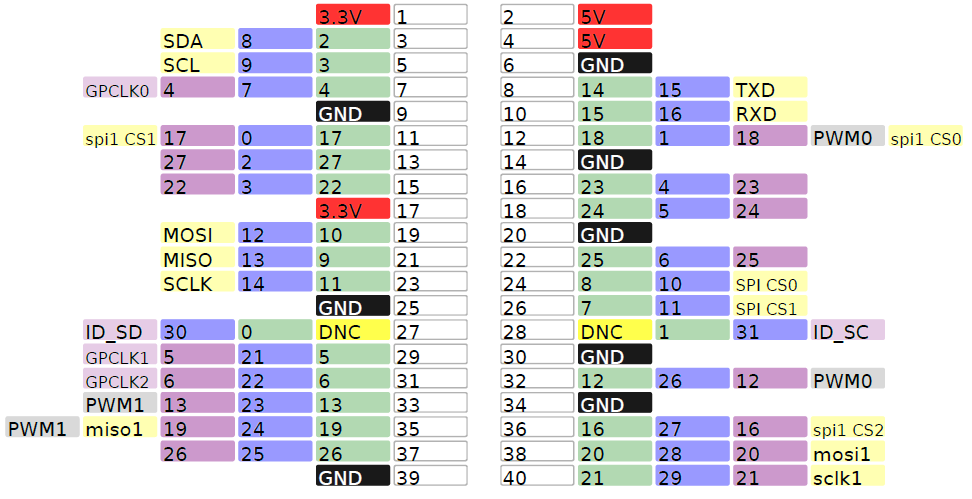



### Practical side of things

3 GPIO pins were used on the Pi Zero W, namely pin 4 (5V), pin 6 (GND) and pin 11 (Digital Input 17) which were connected to the Vcc, GND and OUT pins on the board respectively. This can be seen in the following image:
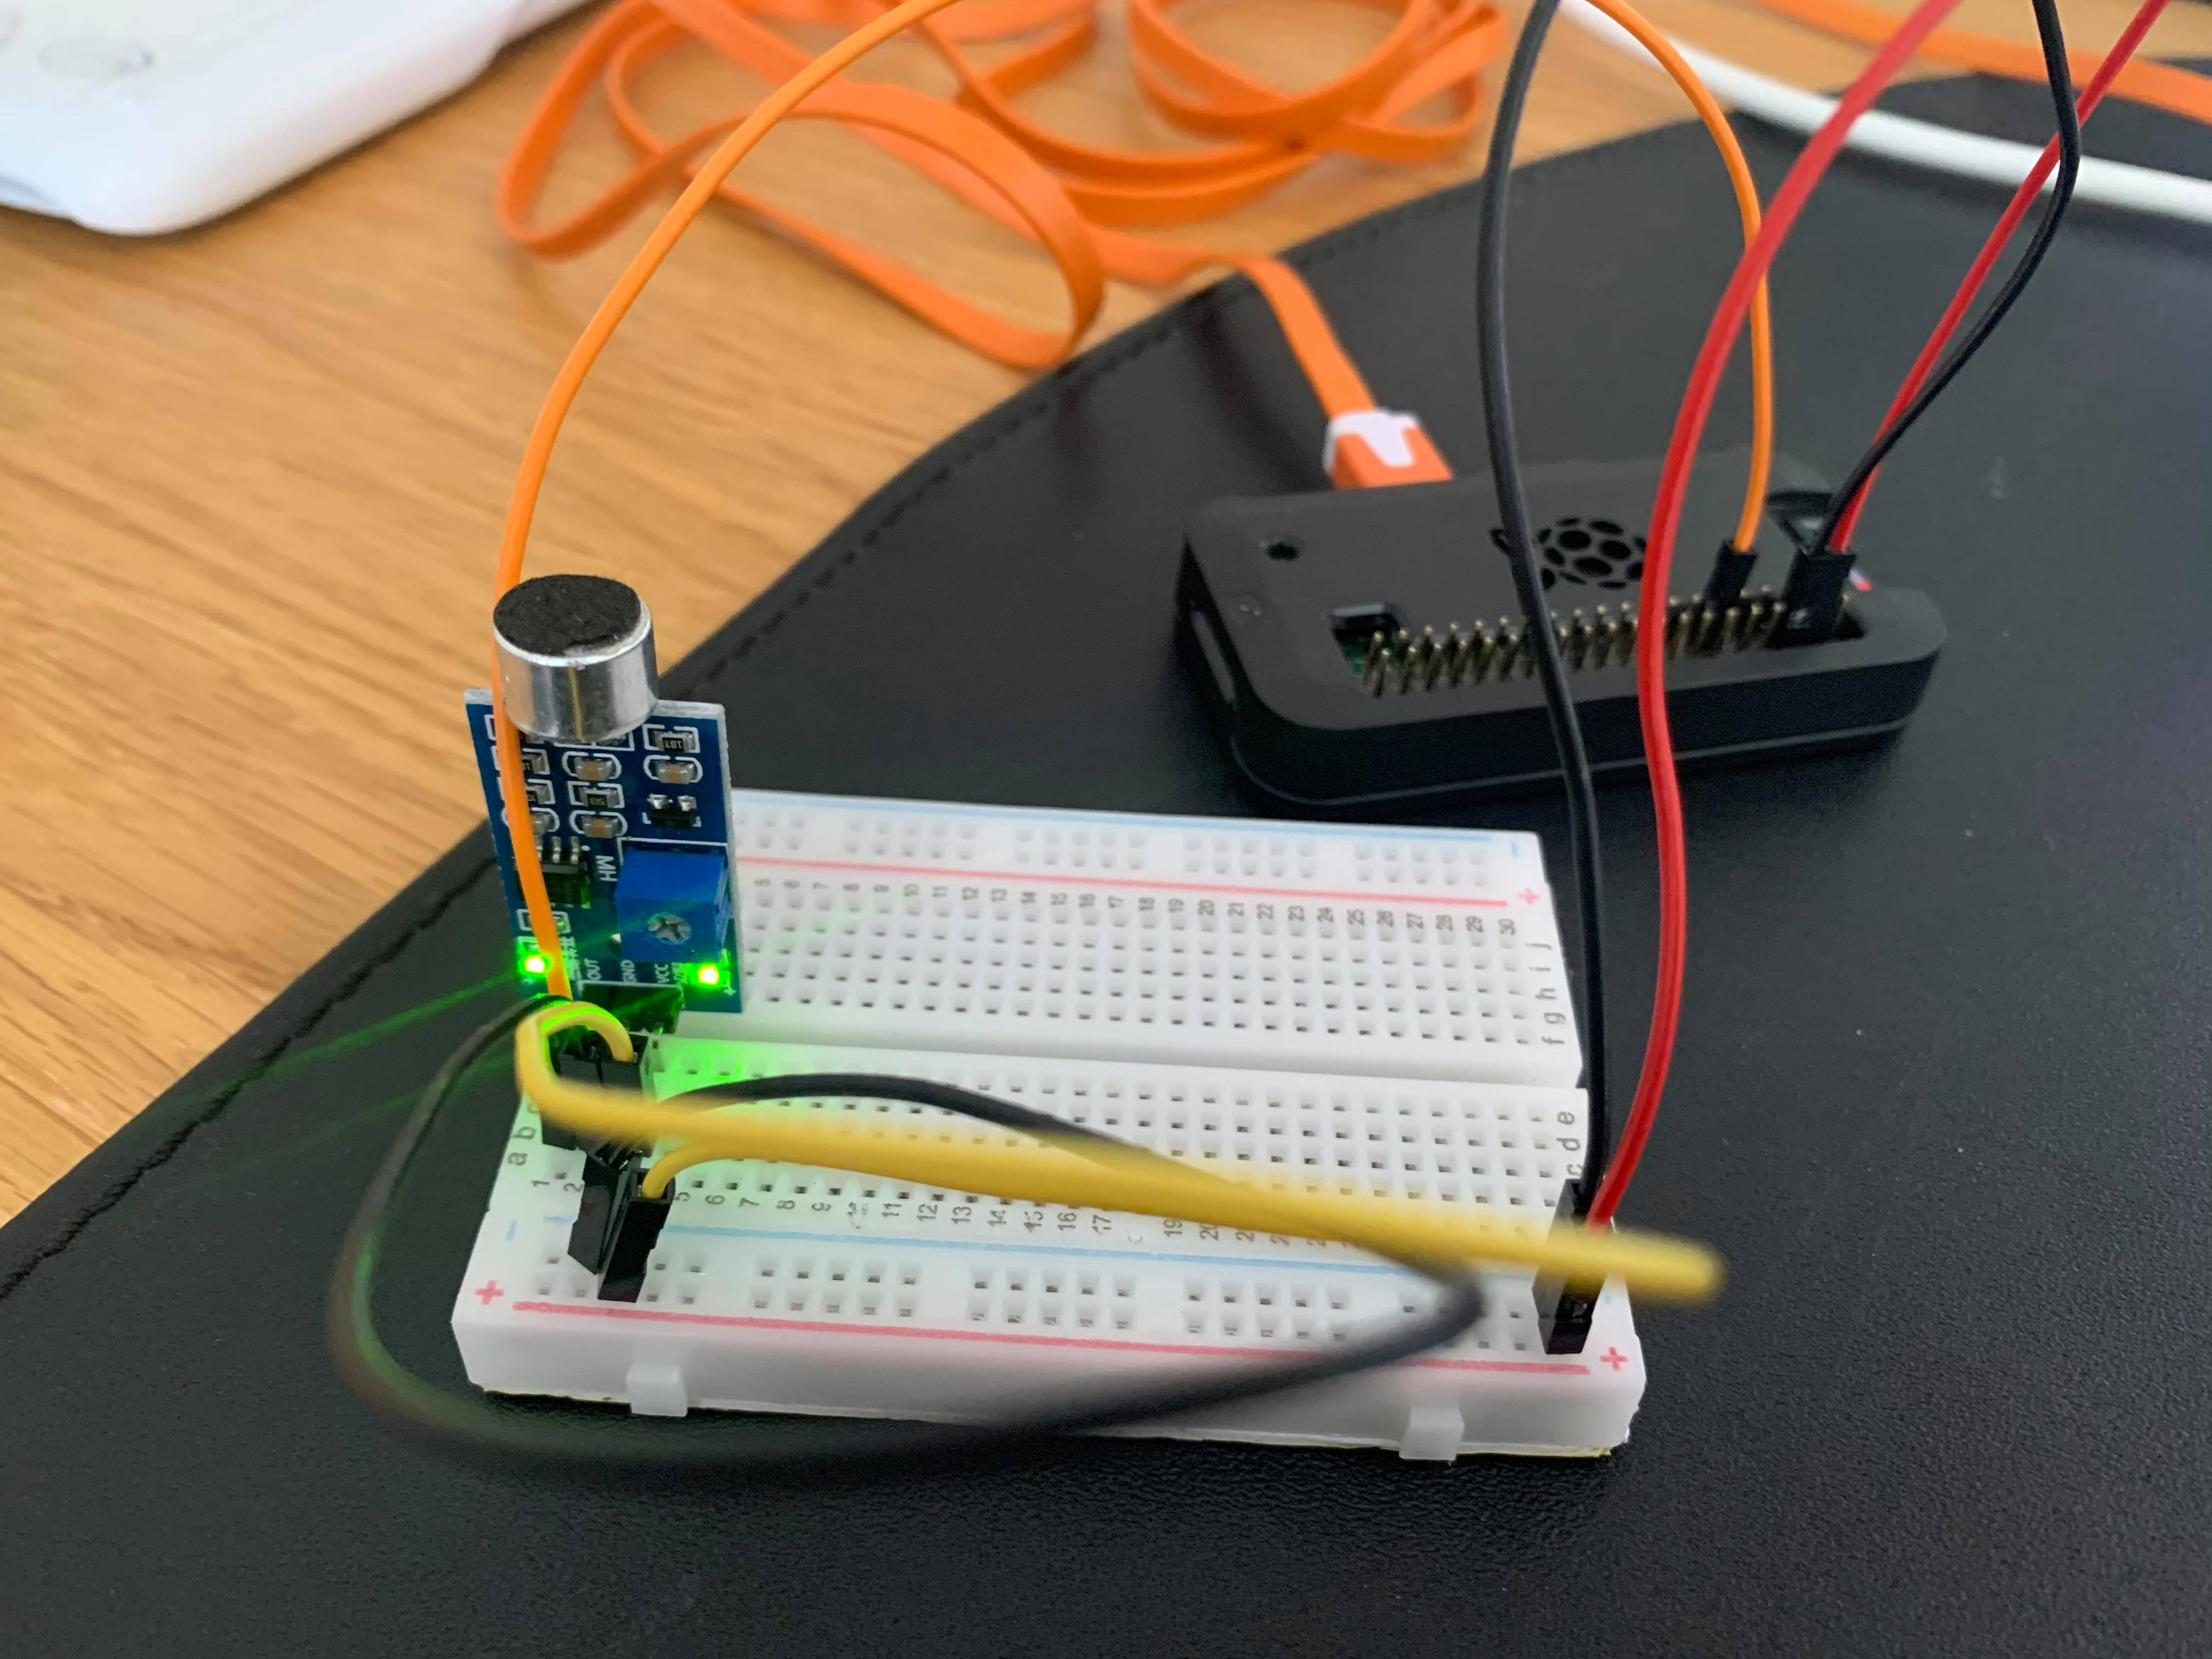

The CZN-15E microphone module contains 2 indicator lights. From the perspective of this image, the right light indicates the module is being powered, and the left light indicates that the microphone is receiving a reading. Note that the microphone module contains an adjustable potentiometer which can be used to change the trigger level (blue box). The output of the module is binary and is HIGH when it reads sound intensity greater than the set trigger level. 

Notice that currently the reading sensor is a constant bright green, this indicates the potentiometer is too sensitive and needed to be adjusted down. With the microphone component facing away from me, turning the adjustor clockwise reduced the trigger level and vice versa. This was done using a Phillips head screwdriver I had at home.

### Recording the results

Now that the potentiometer has been adjusted to the desired trigger level, the circuit was ready to be tested. The following output was produced by the circuit and code following 4 claps infront of the microphone.

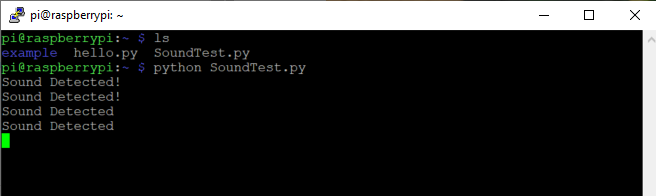


## Extending the code

Now that I have demonstrated basic proficiency in integrating software with hardware, t